In [1]:
# Import required libraries
import sys
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import sqlite3

# Add the src directory to Python path
notebook_dir = Path.cwd()
project_root = notebook_dir.parent
src_path = project_root
sys.path.insert(0, str(src_path))

from src.database.connection import DatabaseConnection

In [2]:
# Initialize database connection
db_connection = DatabaseConnection()
# NEW (proper column names)
df = db_connection.query_to_dataframe('SELECT * FROM sleep_data')

In [3]:
df.date.min(), df.date.max()

('2023-01-04', '2025-06-04')

In [5]:
df.sort_values('date', ascending=False)

,id,user_id,date,sleep_start,sleep_end,total_sleep_minutes,deep_sleep_minutes,light_sleep_minutes,rem_sleep_minutes,wake_minutes,sleep_efficiency,naps_data,data_source,created_at,updated_at
248,1554,1,2025-06-04,2025-06-04 01:10:00+00:00,2025-06-04 10:05:00+00:00,535,89,357,89,0,100.000000,None,zepp,2025-06-04T13:48:19.523293,2025-06-04T13:48:19.523293
247,1553,1,2025-06-03,2025-06-03 00:49:00+00:00,2025-06-03 11:04:00+00:00,615,85,400,130,0,100.000000,None,zepp,2025-06-04T13:48:19.523291,2025-06-04T13:48:19.523292
246,1552,1,2025-06-02,2025-06-02 03:06:00+00:00,2025-06-02 10:01:00+00:00,415,55,277,83,0,100.000000,None,zepp,2025-06-04T13:48:19.523290,2025-06-04T13:48:19.523291
245,1551,1,2025-06-01,2025-06-01 01:18:00+00:00,2025-06-01 11:24:00+00:00,597,101,394,102,9,98.514851,None,zepp,2025-06-04T13:48:19.523289,2025-06-04T13:48:19.523290
244,1550,1,2025-05-31,2025-05-31 01:17:00+00:00,2025-05-31 11:32:00+00:00,614,93,393,128,1,99.837398,None,zepp,2025-06-04T13:48:19.523288,2025-06-04T13:48:19.523288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,1559,1,2023-01-08,2023-01-07 03:00:00+00:00,2023-01-07 03:00:00+00:00,0,0,0,0,0,0.000000,None,zepp,2025-06-04T13:48:19.536430,2025-06-04T13:48:19.536430
252,1558,1,2023-01-07,2023-01-06 03:00:00+00:00,2023-01-06 03:00:00+00:00,0,0,0,0,0,0.000000,None,zepp,2025-06-04T13:48:19.536428,2025-06-04T13:48:19.536429
251,1557,1,2023-01-06,2023-01-05 03:00:00+00:00,2023-01-05 03:00:00+00:00,0,0,0,0,0,0.000000,None,zepp,2025-06-04T13:48:19.536427,2025-06-04T13:48:19.536428
250,1556,1,2023-01-05,2023-01-04 03:00:00+00:00,2023-01-04 03:00:00+00:00,0,0,0,0,0,0.000000,None,zepp,2025-06-04T13:48:19.536425,2025-06-04T13:48:19.536426


In [7]:
# Load all data into a pandas DataFrame
query = """
SELECT
    date,
    steps,
    calories,
    distance,
    run_distance,
    created_at,
    updated_at
FROM daily_activity
ORDER BY date
"""

# Execute query and convert to DataFrame
results = db_connection.execute_query(query)
df = pd.DataFrame([dict(row) for row in results])

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

print(f"📊 Loaded {len(df)} records")
print(f"\n🗓️ Date range: {df['date'].min().date()} to {df['date'].max().date()}")
print(f"\n📋 DataFrame shape: {df.shape}")
print(f"\n📑 Column info:")
print(df.info())


📊 Loaded 749 records

🗓️ Date range: 2023-01-04 to 2025-06-04

📋 DataFrame shape: (749, 7)

📑 Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          749 non-null    datetime64[ns]
 1   steps         749 non-null    int64         
 2   calories      749 non-null    float64       
 3   distance      749 non-null    float64       
 4   run_distance  749 non-null    float64       
 5   created_at    749 non-null    object        
 6   updated_at    749 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 41.1+ KB
None


In [8]:
df.head()

,date,steps,calories,distance,run_distance,created_at,updated_at
0,2023-01-04,5351,202.0,4160.0,0.0,2025-06-04T13:48:19.513174,2025-06-04T13:48:19.513177
1,2023-01-05,8855,326.0,6929.0,0.0,2025-06-04T13:48:19.513177,2025-06-04T13:48:19.513178
2,2023-01-06,19256,770.0,16358.0,0.0,2025-06-04T13:48:19.513179,2025-06-04T13:48:19.513180
3,2023-01-07,13662,520.0,10902.0,0.0,2025-06-04T13:48:19.513180,2025-06-04T13:48:19.513181
4,2023-01-08,14656,557.0,12268.0,0.0,2025-06-04T13:48:19.513181,2025-06-04T13:48:19.513182


In [9]:
# Display first few rows
print("📋 First 5 records:")
print(df.head())

print("\n📋 Last 5 records:")
print(df.tail())

print("\n📊 Basic statistics:")
print(df.describe())


📋 First 5 records:
        date  steps  calories  distance  run_distance  \
0 2023-01-04   5351     202.0    4160.0           0.0   
1 2023-01-05   8855     326.0    6929.0           0.0   
2 2023-01-06  19256     770.0   16358.0           0.0   
3 2023-01-07  13662     520.0   10902.0           0.0   
4 2023-01-08  14656     557.0   12268.0           0.0   

                   created_at                  updated_at  
0  2025-06-04T13:48:19.513174  2025-06-04T13:48:19.513177  
1  2025-06-04T13:48:19.513177  2025-06-04T13:48:19.513178  
2  2025-06-04T13:48:19.513179  2025-06-04T13:48:19.513180  
3  2025-06-04T13:48:19.513180  2025-06-04T13:48:19.513181  
4  2025-06-04T13:48:19.513181  2025-06-04T13:48:19.513182  

📋 Last 5 records:
          date  steps  calories  distance  run_distance  \
744 2025-05-31   2311     109.0    1845.0        1484.0   
745 2025-06-01    628      40.0     459.0         385.0   
746 2025-06-02   4533     207.0    3548.0        2864.0   
747 2025-06-03   4569  

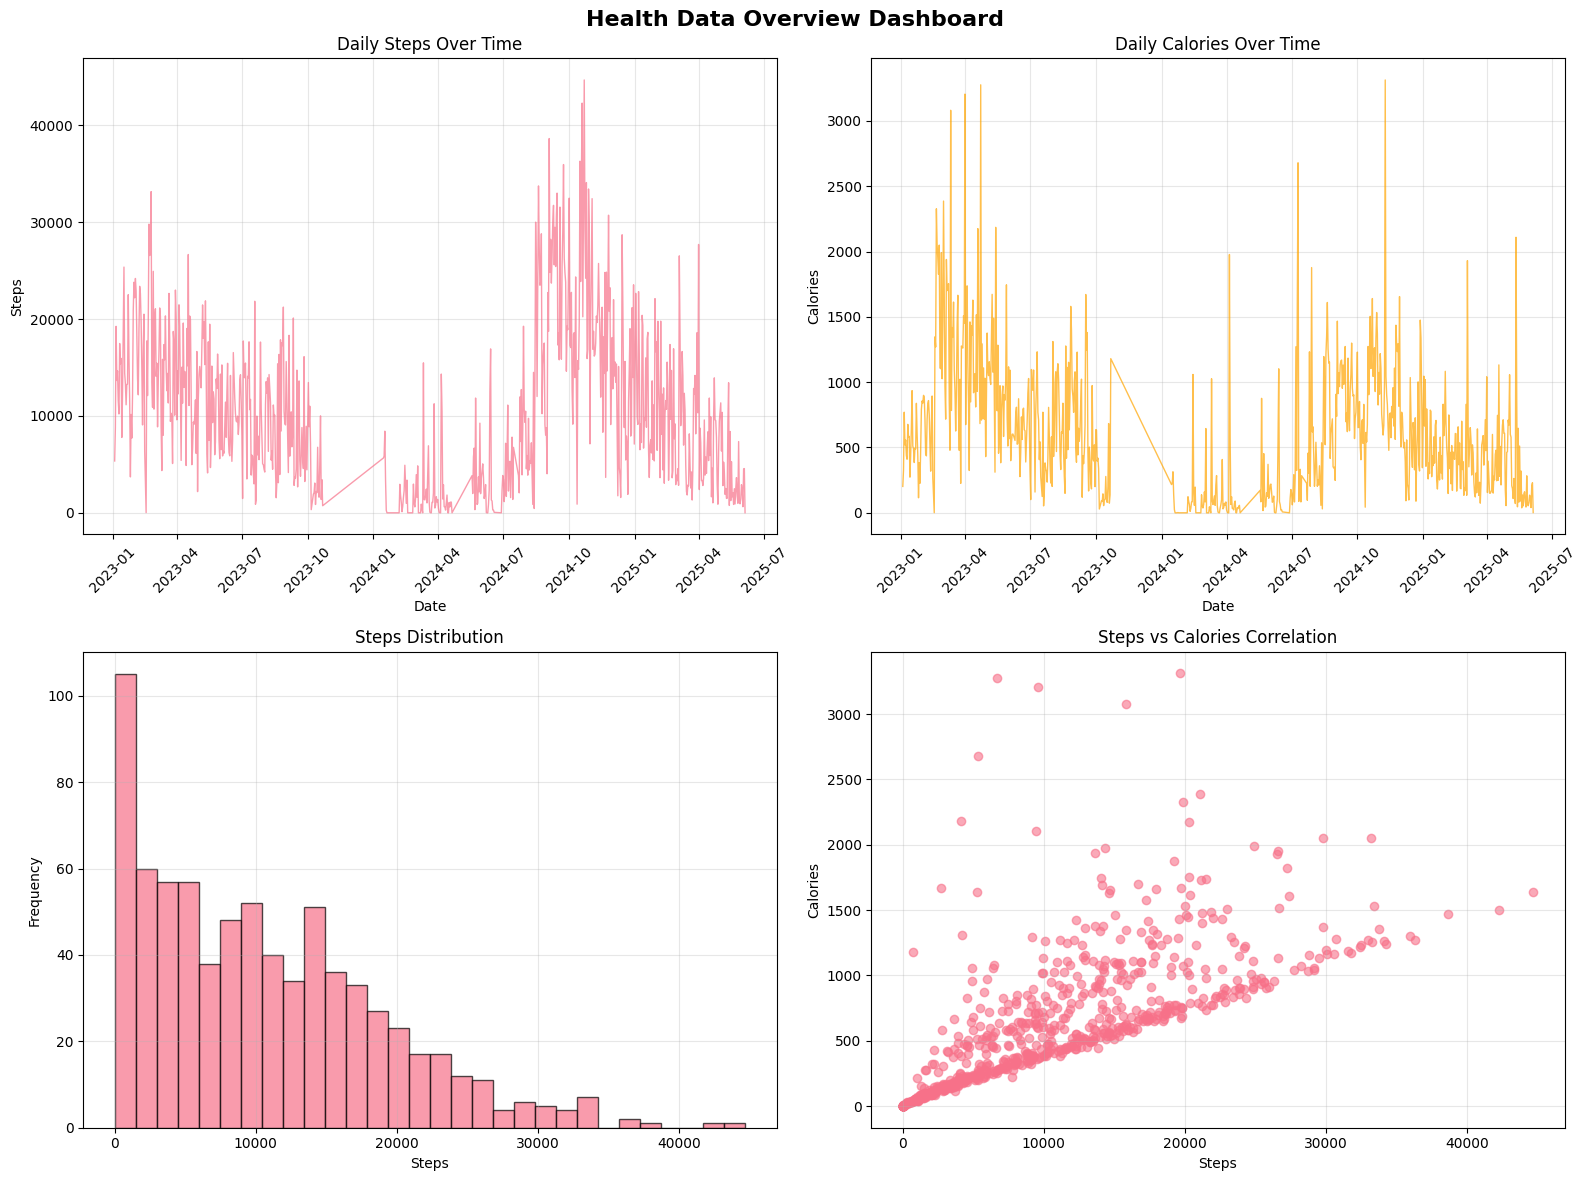

In [10]:
# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

# Create a comprehensive dashboard
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Health Data Overview Dashboard', fontsize=16, fontweight='bold')

# 1. Steps over time
axes[0, 0].plot(df['date'], df['steps'], alpha=0.7, linewidth=1)
axes[0, 0].set_title('Daily Steps Over Time')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Steps')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# 2. Calories over time
axes[0, 1].plot(df['date'], df['calories'], alpha=0.7, linewidth=1, color='orange')
axes[0, 1].set_title('Daily Calories Over Time')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Calories')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# 3. Steps distribution
axes[1, 0].hist(df['steps'], bins=30, alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Steps Distribution')
axes[1, 0].set_xlabel('Steps')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True, alpha=0.3)

# 4. Steps vs Calories scatter plot
axes[1, 1].scatter(df['steps'], df['calories'], alpha=0.6)
axes[1, 1].set_title('Steps vs Calories Correlation')
axes[1, 1].set_xlabel('Steps')
axes[1, 1].set_ylabel('Calories')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [11]:
# Calculate correlation between steps and calories
correlation = df['steps'].corr(df['calories'])
print(f"📊 Correlation between Steps and Calories: {correlation:.3f}")

# Add day of week analysis
df['day_of_week'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.to_period('M')

# Average steps by day of week
print(f"\n📅 Average Steps by Day of Week:")
day_avg = df.groupby('day_of_week')['steps'].mean().sort_values(ascending=False)
for day, avg_steps in day_avg.items():
    print(f"  {day}: {avg_steps:.0f} steps")

print(f"\n📅 Average Calories by Day of Week:")
cal_avg = df.groupby('day_of_week')['calories'].mean().sort_values(ascending=False)
for day, avg_cals in cal_avg.items():
    print(f"  {day}: {avg_cals:.0f} calories")


📊 Correlation between Steps and Calories: 0.715

📅 Average Steps by Day of Week:
  Monday: 12069 steps
  Tuesday: 11358 steps
  Wednesday: 11086 steps
  Thursday: 10654 steps
  Friday: 9831 steps
  Saturday: 9691 steps
  Sunday: 8965 steps

📅 Average Calories by Day of Week:
  Monday: 649 calories
  Tuesday: 649 calories
  Wednesday: 648 calories
  Sunday: 607 calories
  Thursday: 595 calories
  Saturday: 557 calories
  Friday: 549 calories


In [12]:
# Monthly trends
print(f"\n📈 Monthly Trends:")
monthly_stats = df.groupby('month').agg({
    'steps': ['mean', 'max', 'min'],
    'calories': ['mean', 'max', 'min']
}).round(0)

print(monthly_stats)

# Find the most and least active days
print(f"\n🏆 Most Active Days (by steps):")
top_days = df.nlargest(5, 'steps')[['date', 'steps', 'calories']]
for _, row in top_days.iterrows():
    print(f"  {row['date'].date()}: {row['steps']} steps, {row['calories']} calories")

print(f"\n😴 Least Active Days (by steps):")
bottom_days = df.nsmallest(5, 'steps')[['date', 'steps', 'calories']]
for _, row in bottom_days.iterrows():
    print(f"  {row['date'].date()}: {row['steps']} steps, {row['calories']} calories")



📈 Monthly Trends:
           steps               calories               
            mean    max    min     mean     max    min
month                                                 
2023-01  13939.0  25377   3709    517.0   935.0  115.0
2023-02  18256.0  33169     19   1041.0  2327.0    1.0
2023-03  14836.0  23003   4360   1286.0  3081.0  225.0
2023-04  12973.0  26674   2188   1236.0  3276.0  324.0
2023-05  12751.0  21888   4121   1005.0  2185.0  311.0
2023-06  10120.0  16547   5314    662.0  1117.0  277.0
2023-07   9167.0  21847    882    538.0  1232.0   53.0
2023-08  10046.0  21245   1554    786.0  1580.0  149.0
2023-09   8277.0  20119   2678    640.0  1671.0  119.0
2023-10   4664.0  13451    326    288.0  1180.0   29.0
2024-01   1572.0   8429      0     61.0   314.0    0.0
2024-02   1153.0   4911      0     90.0  1059.0    0.0
2024-03   2195.0  15484      0    125.0  1026.0    0.0
2024-04   1896.0  14327      0    160.0  1977.0    0.0
2024-05   4088.0  11850    322    216.0   876.

In [13]:
df

,date,steps,calories,distance,run_distance,created_at,updated_at,day_of_week,month
0,2023-01-04,5351,202.0,4160.0,0.0,2025-06-04T13:48:19.513174,2025-06-04T13:48:19.513177,Wednesday,2023-01
1,2023-01-05,8855,326.0,6929.0,0.0,2025-06-04T13:48:19.513177,2025-06-04T13:48:19.513178,Thursday,2023-01
2,2023-01-06,19256,770.0,16358.0,0.0,2025-06-04T13:48:19.513179,2025-06-04T13:48:19.513180,Friday,2023-01
3,2023-01-07,13662,520.0,10902.0,0.0,2025-06-04T13:48:19.513180,2025-06-04T13:48:19.513181,Saturday,2023-01
4,2023-01-08,14656,557.0,12268.0,0.0,2025-06-04T13:48:19.513181,2025-06-04T13:48:19.513182,Sunday,2023-01
...,...,...,...,...,...,...,...,...,...
744,2025-05-31,2311,109.0,1845.0,1484.0,2025-06-04T13:48:19.500407,2025-06-04T13:48:19.500408,Saturday,2025-05
745,2025-06-01,628,40.0,459.0,385.0,2025-06-04T13:48:19.500409,2025-06-04T13:48:19.500409,Sunday,2025-06
746,2025-06-02,4533,207.0,3548.0,2864.0,2025-06-04T13:48:19.500410,2025-06-04T13:48:19.500411,Monday,2025-06
747,2025-06-03,4569,230.0,3909.0,3125.0,2025-06-04T13:48:19.500411,2025-06-04T13:48:19.500412,Tuesday,2025-06


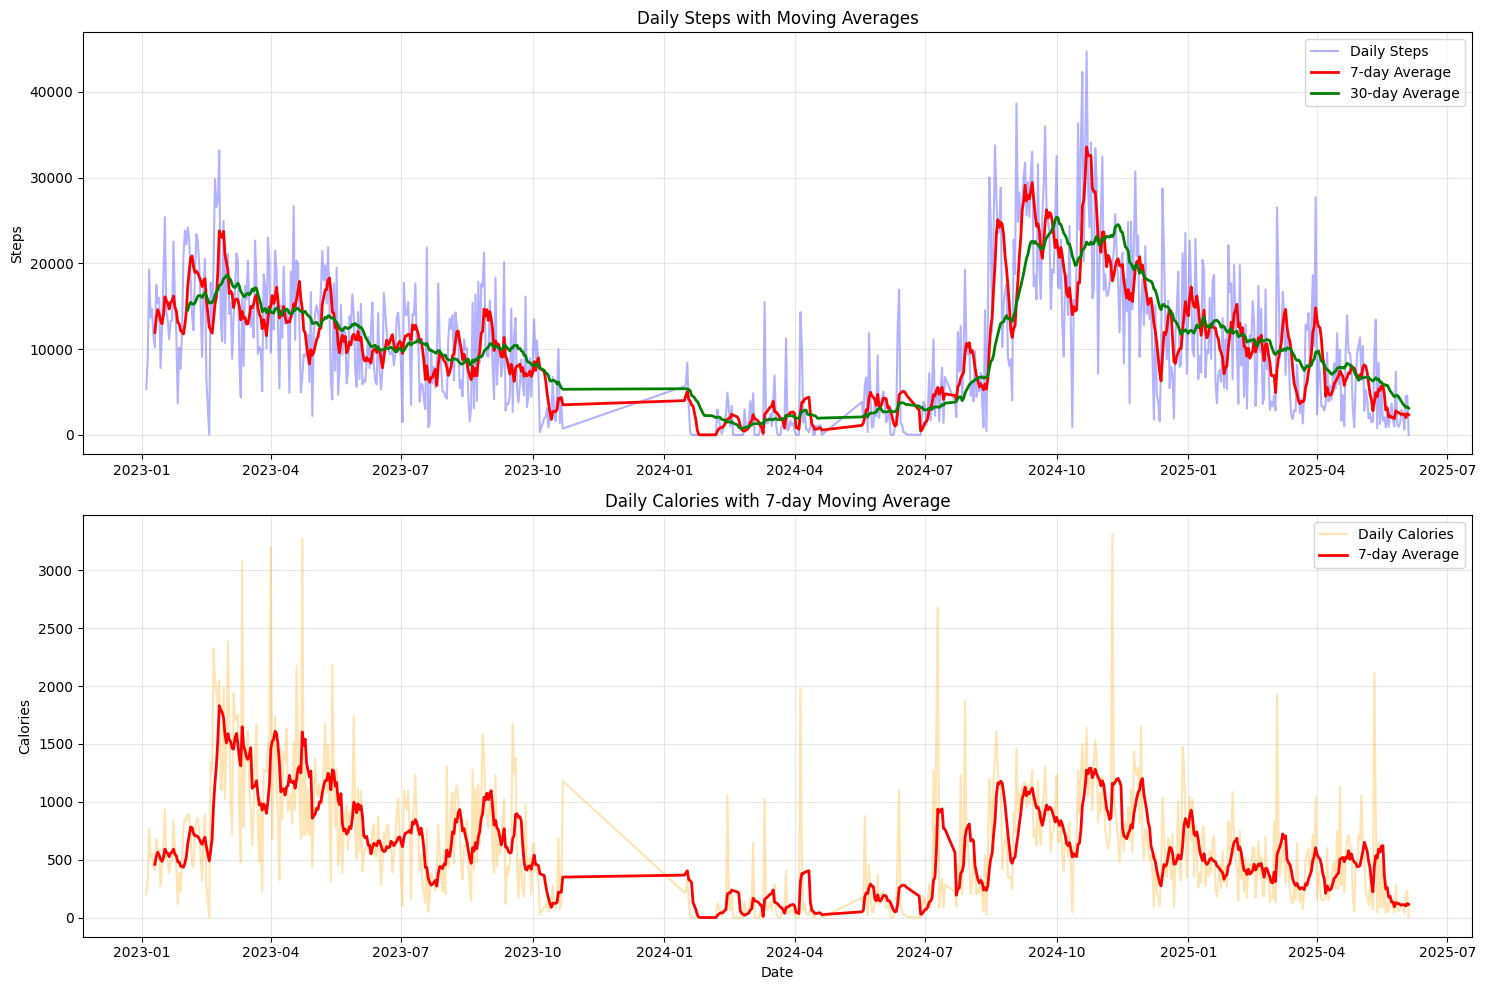

In [14]:
# Moving averages for trend analysis
df['steps_7day_avg'] = df['steps'].rolling(window=7).mean()
df['steps_30day_avg'] = df['steps'].rolling(window=30).mean()
df['calories_7day_avg'] = df['calories'].rolling(window=7).mean()

# Plot moving averages
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Steps with moving averages
ax1.plot(df['date'], df['steps'], alpha=0.3, label='Daily Steps', color='blue')
ax1.plot(df['date'], df['steps_7day_avg'], label='7-day Average', color='red', linewidth=2)
ax1.plot(df['date'], df['steps_30day_avg'], label='30-day Average', color='green', linewidth=2)
ax1.set_title('Daily Steps with Moving Averages')
ax1.set_ylabel('Steps')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Calories with moving average
ax2.plot(df['date'], df['calories'], alpha=0.3, label='Daily Calories', color='orange')
ax2.plot(df['date'], df['calories_7day_avg'], label='7-day Average', color='red', linewidth=2)
ax2.set_title('Daily Calories with 7-day Moving Average')
ax2.set_xlabel('Date')
ax2.set_ylabel('Calories')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


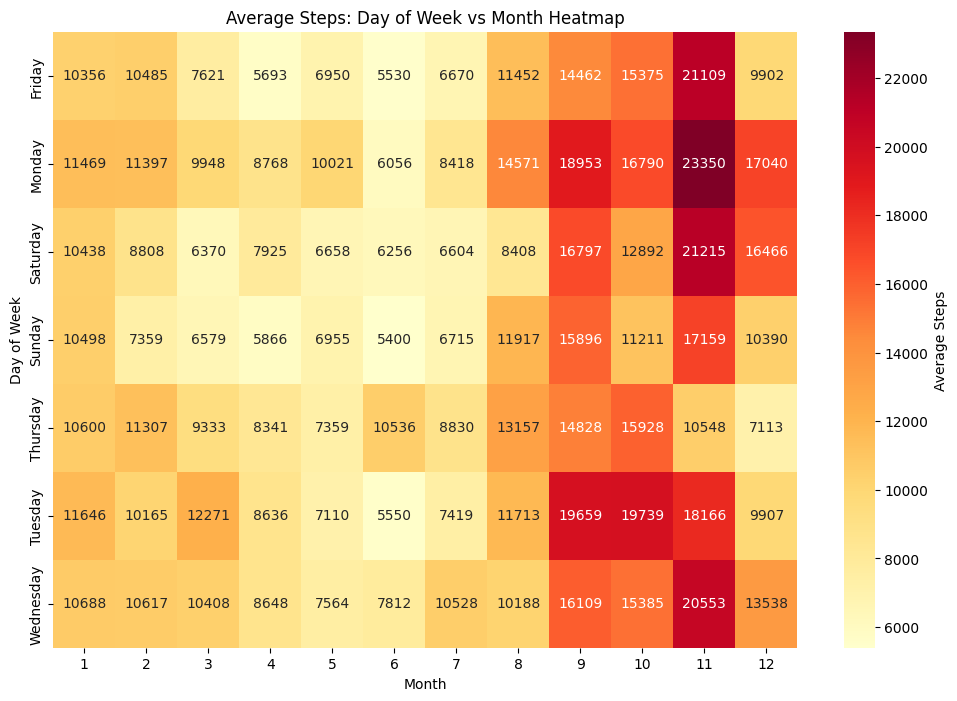

📊 Weekly Activity Patterns:
               steps         calories       
                mean     std     mean    std
day_of_week                                 
Friday        9831.0  8285.0    549.0  444.0
Monday       12069.0  8898.0    649.0  505.0
Saturday      9691.0  8195.0    557.0  546.0
Sunday        8965.0  7276.0    607.0  587.0
Thursday     10654.0  7958.0    595.0  473.0
Tuesday      11358.0  9090.0    649.0  523.0
Wednesday    11086.0  8207.0    648.0  509.0


In [15]:
# Heatmap for day of week vs month patterns
pivot_steps = df.pivot_table(values='steps',
                            index='day_of_week',
                            columns=df['date'].dt.month,
                            aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_steps, annot=True, fmt='.0f', cmap='YlOrRd',
            cbar_kws={'label': 'Average Steps'})
plt.title('Average Steps: Day of Week vs Month Heatmap')
plt.xlabel('Month')
plt.ylabel('Day of Week')
plt.show()

# Weekly activity patterns
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_stats = df.groupby('day_of_week').agg({
    'steps': ['mean', 'std'],
    'calories': ['mean', 'std']
}).round(0)

print("📊 Weekly Activity Patterns:")
print(day_stats)


In [16]:
def analyze_period(start_date, end_date):
    """Analyze data for a specific time period."""
    mask = (df['date'] >= start_date) & (df['date'] <= end_date)
    period_data = df.loc[mask]

    print(f"📅 Analysis for {start_date} to {end_date}")
    print(f"📊 Total days: {len(period_data)}")
    print(f"👟 Average daily steps: {period_data['steps'].mean():.0f}")
    print(f"🔥 Average daily calories: {period_data['calories'].mean():.0f}")
    print(f"🏆 Max steps: {period_data['steps'].max()} on {period_data.loc[period_data['steps'].idxmax(), 'date'].date()}")
    print(f"😴 Min steps: {period_data['steps'].min()} on {period_data.loc[period_data['steps'].idxmin(), 'date'].date()}")

    return period_data

def find_streaks(threshold=10000):
    """Find consecutive days above a step threshold."""
    df['above_threshold'] = df['steps'] >= threshold
    df['streak_group'] = (df['above_threshold'] != df['above_threshold'].shift()).cumsum()

    streaks = df[df['above_threshold']].groupby('streak_group').size()
    longest_streak = streaks.max() if len(streaks) > 0 else 0

    print(f"🎯 Step goal: {threshold:,} steps")
    print(f"🔥 Longest streak: {longest_streak} days")
    print(f"📊 Total days above goal: {df['above_threshold'].sum()}")
    print(f"📈 Success rate: {(df['above_threshold'].sum() / len(df) * 100):.1f}%")

    return longest_streak

# Example usage
print("🔍 Recent 30-day analysis:")
recent_data = analyze_period('2024-08-01', '2024-08-31')

print(f"\n🎯 Step goal analysis:")
find_streaks(10000)


🔍 Recent 30-day analysis:
📅 Analysis for 2024-08-01 to 2024-08-31
📊 Total days: 31
👟 Average daily steps: 13158
🔥 Average daily calories: 593
🏆 Max steps: 33756 on 2024-08-19
😴 Min steps: 447 on 2024-08-13

🎯 Step goal analysis:
🎯 Step goal: 10,000 steps
🔥 Longest streak: 35 days
📊 Total days above goal: 345
📈 Success rate: 46.1%


np.int64(35)